In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Luka Doncic,DAL,47.0,37.4,34.2,11.5,23.4,49.2,3.9,...,77.7,0.7,8.1,8.8,9.5,1.4,0.6,4.0,36.6,2023-24
2,2,Shai Gilgeous-Alexander,OKC,53.0,34.5,31.1,10.9,20.1,54.6,1.2,...,88.3,0.9,4.6,5.5,6.5,2.2,0.9,2.2,33.9,2023-24
3,3,Giannis Antetokounmpo,MIL,54.0,35.0,30.8,11.6,18.8,61.6,0.4,...,65.3,2.5,8.7,11.2,6.4,1.4,1.1,3.5,36.3,2023-24
4,4,Donovan Mitchell,CLE,44.0,35.5,28.4,9.9,20.9,47.3,3.3,...,86.4,1.0,4.5,5.4,6.3,1.9,0.5,2.8,27.9,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,KJ Martin,PHI,40.0,11.2,3.4,1.5,2.7,54.6,0.1,...,50.0,0.4,1.2,1.6,0.7,0.4,0.1,0.5,4.1,2023-24
251,251,Zeke Nnaji,DEN,40.0,9.6,3.3,1.2,2.7,43.9,0.1,...,68.1,1.2,1.0,2.2,0.6,0.3,0.6,0.6,4.3,2023-24
252,252,Ish Smith,CHA,43.0,17.2,3.2,1.5,3.7,41.8,0.1,...,75.0,0.3,1.5,1.8,3.4,0.4,0.1,1.1,5.6,2023-24
253,253,JT Thor,CHA,43.0,13.4,3.0,1.2,3.2,36.7,0.4,...,53.8,0.9,1.6,2.5,0.4,0.2,0.4,0.3,4.0,2023-24


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       255 non-null    object 
 1   PLAYER  254 non-null    object 
 2   TEAM    254 non-null    object 
 3   GP      254 non-null    float64
 4   MIN     254 non-null    float64
 5   PTS     254 non-null    float64
 6   FGM     254 non-null    float64
 7   FGA     254 non-null    float64
 8   FG%     254 non-null    float64
 9   3PM     254 non-null    float64
 10  3PA     254 non-null    float64
 11  3P%     254 non-null    float64
 12  FTM     254 non-null    float64
 13  FTA     254 non-null    float64
 14  FT%     254 non-null    float64
 15  OREB    254 non-null    float64
 16  DREB    254 non-null    float64
 17  REB     254 non-null    float64
 18  AST     254 non-null    float64
 19  STL     254 non-null    float64
 20  BLK     254 non-null    float64
 21  TOV     254 non-null    float64
 22  EF

# Data Cleaning

In [23]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [24]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Luka Doncic,DAL,47.0,37.4,34.2,11.5,23.4,49.2,3.9,...,9.3,77.7,0.7,8.1,8.8,9.5,1.4,0.6,4.0,36.6
2,2023-24,Shai Gilgeous-Alexander,OKC,53.0,34.5,31.1,10.9,20.1,54.6,1.2,...,9.1,88.3,0.9,4.6,5.5,6.5,2.2,0.9,2.2,33.9
3,2023-24,Giannis Antetokounmpo,MIL,54.0,35.0,30.8,11.6,18.8,61.6,0.4,...,10.9,65.3,2.5,8.7,11.2,6.4,1.4,1.1,3.5,36.3
4,2023-24,Donovan Mitchell,CLE,44.0,35.5,28.4,9.9,20.9,47.3,3.3,...,6.2,86.4,1.0,4.5,5.4,6.3,1.9,0.5,2.8,27.9
5,2023-24,Kevin Durant,PHX,48.0,37.0,28.2,10.2,19.0,53.8,2.3,...,6.3,87.1,0.5,6.1,6.6,5.7,0.9,1.3,3.2,29.9


In [25]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 1 to 254
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    254 non-null    object 
 1   PLAYER  254 non-null    object 
 2   TEAM    254 non-null    object 
 3   GP      254 non-null    float64
 4   MIN     254 non-null    float64
 5   PTS     254 non-null    float64
 6   FGM     254 non-null    float64
 7   FGA     254 non-null    float64
 8   FG%     254 non-null    float64
 9   3PM     254 non-null    float64
 10  3PA     254 non-null    float64
 11  3P%     254 non-null    float64
 12  FTM     254 non-null    float64
 13  FTA     254 non-null    float64
 14  FT%     254 non-null    float64
 15  OREB    254 non-null    float64
 16  DREB    254 non-null    float64
 17  REB     254 non-null    float64
 18  AST     254 non-null    float64
 19  STL     254 non-null    float64
 20  BLK     254 non-null    float64
 21  TOV     254 non-null    float64
 22  EF

In [27]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
11,2023-24,Trae Young,ATL,50.0,36.5,26.7,8.3,19.4,42.7,3.3,...,7.9,85.8,0.4,2.3,2.7,10.9,1.4,0.2,4.3,25.4
1,2023-24,Luka Doncic,DAL,47.0,37.4,34.2,11.5,23.4,49.2,3.9,...,9.3,77.7,0.7,8.1,8.8,9.5,1.4,0.6,4.0,36.6
13,2023-24,Nikola Jokic,DEN,53.0,33.8,26.1,10.2,17.7,57.7,1.1,...,5.7,81.3,3.0,9.1,12.0,8.9,1.2,0.9,2.9,37.6
16,2023-24,LeBron James,LAL,49.0,34.9,24.8,9.3,17.9,52.0,2.1,...,5.5,74.1,0.9,6.3,7.2,7.8,1.3,0.6,3.2,28.3
8,2023-24,Devin Booker,PHX,45.0,35.5,27.5,9.6,19.2,50.0,2.2,...,7.0,87.0,0.7,3.9,4.6,7.0,0.9,0.4,2.6,27.4
2,2023-24,Shai Gilgeous-Alexander,OKC,53.0,34.5,31.1,10.9,20.1,54.6,1.2,...,9.1,88.3,0.9,4.6,5.5,6.5,2.2,0.9,2.2,33.9
7,2023-24,Jalen Brunson,NYK,52.0,35.9,27.6,9.8,20.4,48.3,2.7,...,6.3,83.5,0.6,3.3,3.8,6.5,0.9,0.2,2.4,25.0
3,2023-24,Giannis Antetokounmpo,MIL,54.0,35.0,30.8,11.6,18.8,61.6,0.4,...,10.9,65.3,2.5,8.7,11.2,6.4,1.4,1.1,3.5,36.3
14,2023-24,Tyrese Maxey,PHI,49.0,37.2,25.7,8.9,19.9,44.9,3.0,...,5.6,85.4,0.6,3.1,3.7,6.4,1.0,0.5,1.7,23.8
4,2023-24,Donovan Mitchell,CLE,44.0,35.5,28.4,9.9,20.9,47.3,3.3,...,6.2,86.4,1.0,4.5,5.4,6.3,1.9,0.5,2.8,27.9


In [28]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
15,2023-24,Anthony Davis,LAL,52.0,35.7,24.9,9.5,17.2,55.3,0.4,...,6.9,81.0,3.0,9.1,12.2,3.8,1.1,2.5,2.1,33.4
13,2023-24,Nikola Jokic,DEN,53.0,33.8,26.1,10.2,17.7,57.7,1.1,...,5.7,81.3,3.0,9.1,12.0,8.9,1.2,0.9,2.9,37.6
3,2023-24,Giannis Antetokounmpo,MIL,54.0,35.0,30.8,11.6,18.8,61.6,0.4,...,10.9,65.3,2.5,8.7,11.2,6.4,1.4,1.1,3.5,36.3
19,2023-24,Julius Randle,NYK,46.0,35.4,24.0,8.6,18.2,47.2,1.7,...,6.6,78.1,2.2,7.0,9.2,5.0,0.5,0.3,3.5,24.5
1,2023-24,Luka Doncic,DAL,47.0,37.4,34.2,11.5,23.4,49.2,3.9,...,9.3,77.7,0.7,8.1,8.8,9.5,1.4,0.6,4.0,36.6
9,2023-24,Jayson Tatum,BOS,52.0,35.8,27.1,9.3,19.5,47.5,3.1,...,6.8,82.4,0.9,7.7,8.6,4.8,1.0,0.6,2.5,28.2
20,2023-24,Lauri Markkanen,UTA,46.0,32.8,23.4,7.9,16.2,49.1,3.2,...,4.8,88.7,2.3,6.2,8.6,1.9,0.8,0.5,1.3,25.1
16,2023-24,LeBron James,LAL,49.0,34.9,24.8,9.3,17.9,52.0,2.1,...,5.5,74.1,0.9,6.3,7.2,7.8,1.3,0.6,3.2,28.3
5,2023-24,Kevin Durant,PHX,48.0,37.0,28.2,10.2,19.0,53.8,2.3,...,6.3,87.1,0.5,6.1,6.6,5.7,0.9,1.3,3.2,29.9
18,2023-24,Kawhi Leonard,LAC,48.0,34.3,24.1,9.0,17.1,52.7,2.3,...,4.2,89.1,1.2,5.0,6.2,3.7,1.7,0.9,1.6,26.3


In [60]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Luka Doncic,DAL,47.0,37.4,34.2,11.5,23.4,49.2,3.9,...,9.3,77.7,0.7,8.1,8.8,9.5,1.4,0.6,4.0,36.6
2,2023-24,Shai Gilgeous-Alexander,OKC,53.0,34.5,31.1,10.9,20.1,54.6,1.2,...,9.1,88.3,0.9,4.6,5.5,6.5,2.2,0.9,2.2,33.9
3,2023-24,Giannis Antetokounmpo,MIL,54.0,35.0,30.8,11.6,18.8,61.6,0.4,...,10.9,65.3,2.5,8.7,11.2,6.4,1.4,1.1,3.5,36.3
4,2023-24,Donovan Mitchell,CLE,44.0,35.5,28.4,9.9,20.9,47.3,3.3,...,6.2,86.4,1.0,4.5,5.4,6.3,1.9,0.5,2.8,27.9
5,2023-24,Kevin Durant,PHX,48.0,37.0,28.2,10.2,19.0,53.8,2.3,...,6.3,87.1,0.5,6.1,6.6,5.7,0.9,1.3,3.2,29.9
6,2023-24,Stephen Curry,GSW,50.0,33.5,28.0,9.1,19.8,46.2,5.0,...,5.1,92.2,0.5,3.9,4.4,5.0,0.8,0.4,3.0,24.6
7,2023-24,Jalen Brunson,NYK,52.0,35.9,27.6,9.8,20.4,48.3,2.7,...,6.3,83.5,0.6,3.3,3.8,6.5,0.9,0.2,2.4,25.0
8,2023-24,Devin Booker,PHX,45.0,35.5,27.5,9.6,19.2,50.0,2.2,...,7.0,87.0,0.7,3.9,4.6,7.0,0.9,0.4,2.6,27.4
9,2023-24,Jayson Tatum,BOS,52.0,35.8,27.1,9.3,19.5,47.5,3.1,...,6.8,82.4,0.9,7.7,8.6,4.8,1.0,0.6,2.5,28.2
10,2023-24,De'Aaron Fox,SAC,48.0,35.6,26.8,9.6,20.7,46.4,2.9,...,6.5,70.6,0.9,3.2,4.1,5.5,1.9,0.4,2.6,23.1


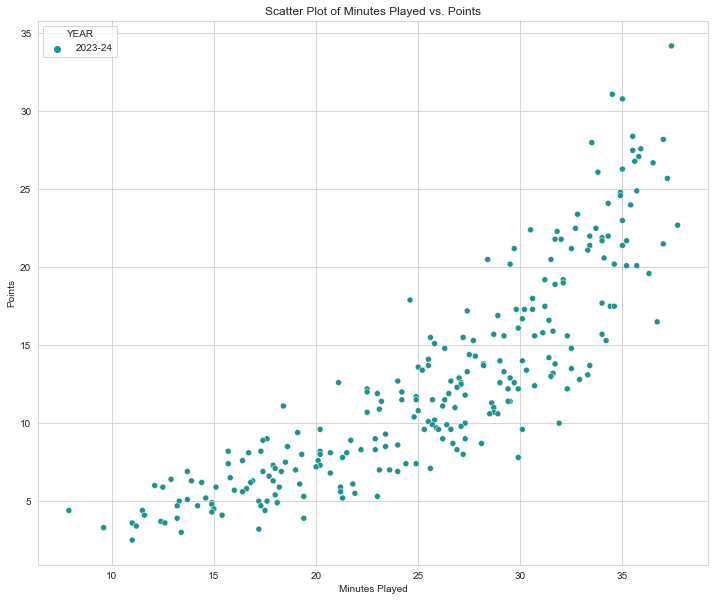

In [59]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


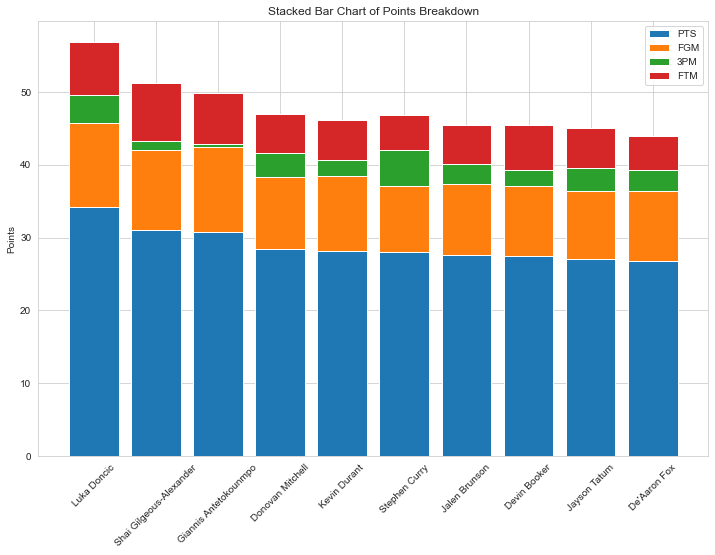

In [30]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [31]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [32]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
3     Giannis Antetokounmpo  2023-24  35.0  30.8  11.2
1               Luka Doncic  2023-24  37.4  34.2   8.8
9              Jayson Tatum  2023-24  35.8  27.1   8.6
5              Kevin Durant  2023-24  37.0  28.2   6.6
2   Shai Gilgeous-Alexander  2023-24  34.5  31.1   5.5
4          Donovan Mitchell  2023-24  35.5  28.4   5.4
12          Anthony Edwards  2023-24  35.0  26.3   5.2
8              Devin Booker  2023-24  35.5  27.5   4.6
6             Stephen Curry  2023-24  33.5  28.0   4.4
10             De'Aaron Fox  2023-24  35.6  26.8   4.1


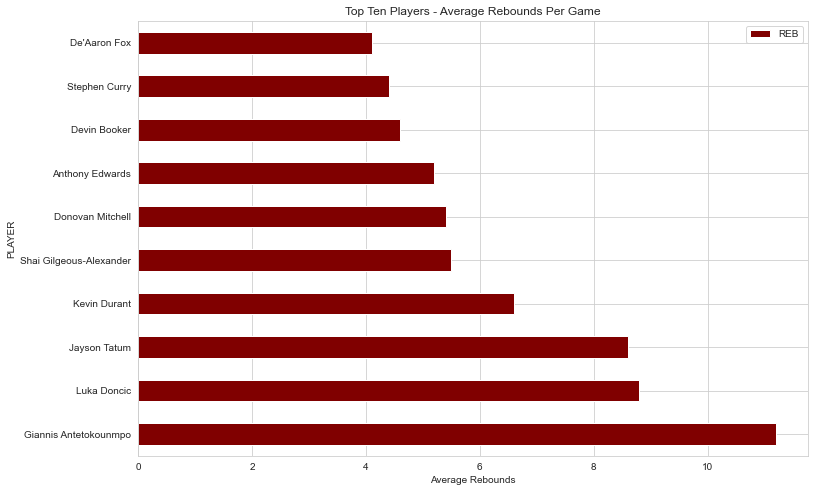

In [33]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 1 to 254
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    254 non-null    object 
 1   PLAYER  254 non-null    object 
 2   TEAM    254 non-null    object 
 3   GP      254 non-null    float64
 4   MIN     254 non-null    float64
 5   PTS     254 non-null    float64
 6   FGM     254 non-null    float64
 7   FGA     254 non-null    float64
 8   FG%     254 non-null    float64
 9   3PM     254 non-null    float64
 10  3PA     254 non-null    float64
 11  3P%     254 non-null    float64
 12  FTM     254 non-null    float64
 13  FTA     254 non-null    float64
 14  FT%     254 non-null    float64
 15  OREB    254 non-null    float64
 16  DREB    254 non-null    float64
 17  REB     254 non-null    float64
 18  AST     254 non-null    float64
 19  STL     254 non-null    float64
 20  BLK     254 non-null    float64
 21  TOV     254 non-null    float64
 22  EF

In [35]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Statistics


In [36]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

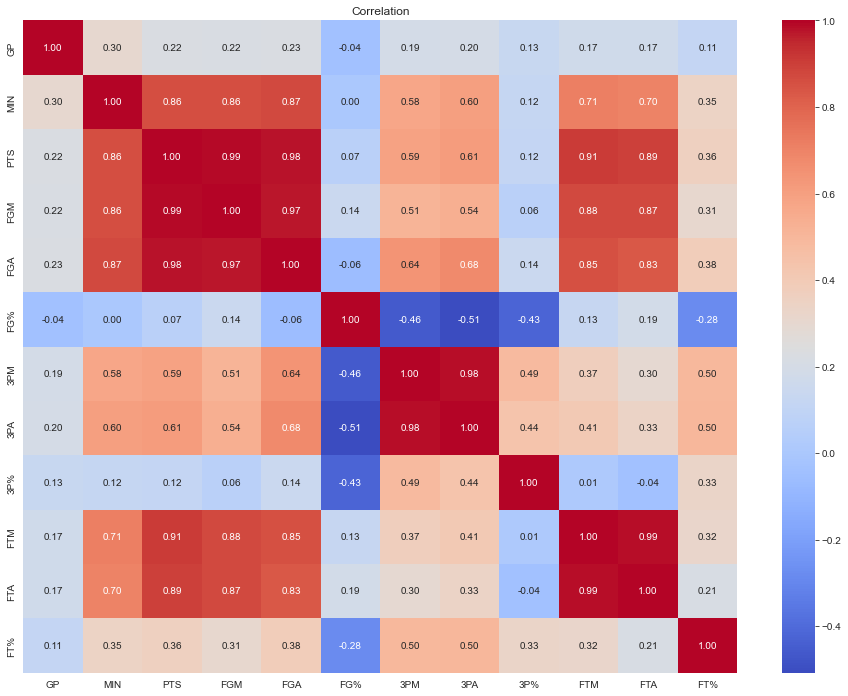

In [37]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

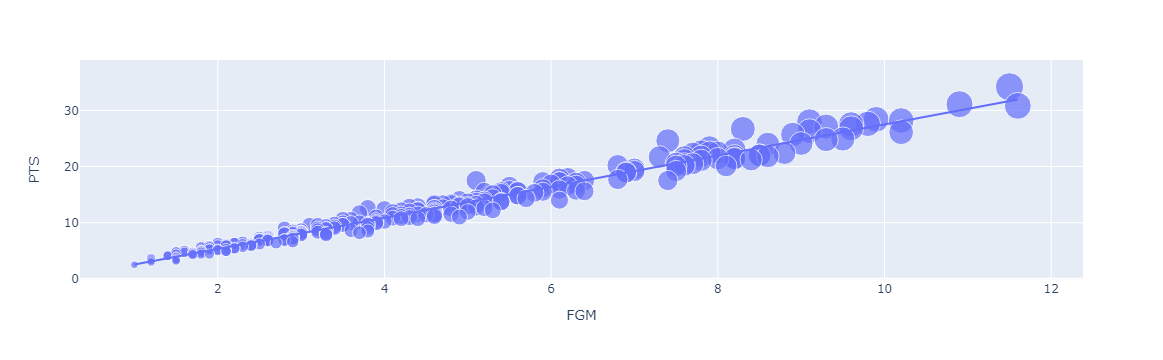

In [44]:
import plotly.express as px

# Visualize the relationship between Field Goals Made (FGM) and Points (PTS)
figure = px.scatter(data_frame=df, x='FGM', y='PTS', size='PTS', trendline='ols')
figure.show()


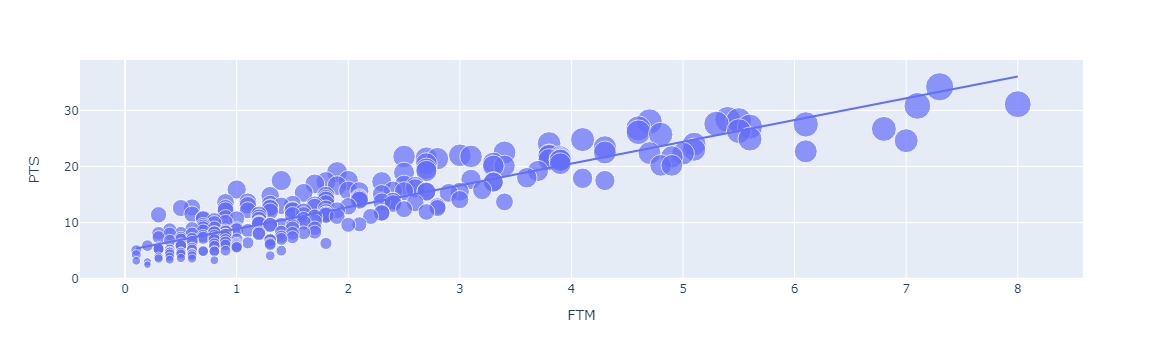

In [47]:
# Visualize the relationship between Field Throws Made (FGM) and Points (PTS)
figure = px.scatter(data_frame=df, x='FTM', y='PTS', size='PTS', trendline='ols')
figure.show()

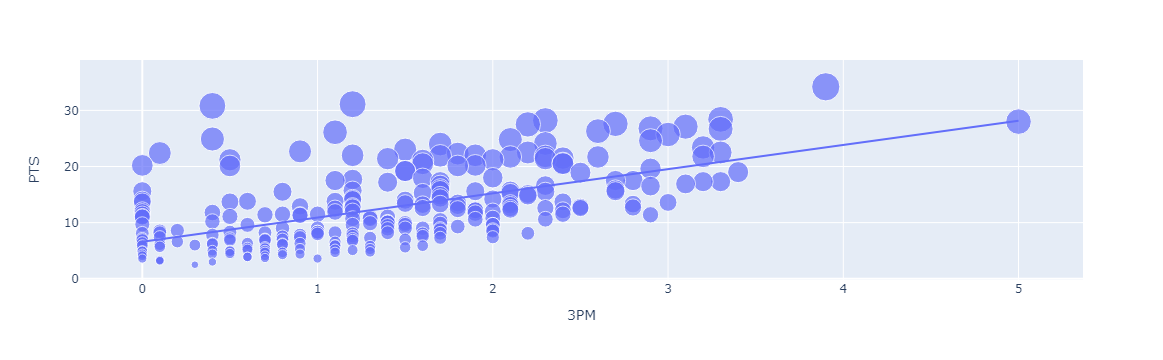

In [49]:
# Visualize the relationship between Field Goals Made (FGM) and Points (PTS)
figure = px.scatter(data_frame=df, x='3PM', y='PTS', size='PTS', trendline='ols')
figure.show()

In [52]:
# Correlation with all columns with the Points column
correlation = df.corr()
print(correlation['PTS'].sort_values(ascending=False))

PTS     1.000000
FGM     0.989090
FGA     0.981380
FTM     0.910592
EFF     0.904308
FTA     0.894923
MIN     0.860407
TOV     0.843643
AST     0.697262
3PA     0.612752
3PM     0.590079
DREB    0.581387
STL     0.576721
REB     0.465153
FT%     0.362580
GP      0.223138
BLK     0.213741
3P%     0.115158
OREB    0.103778
FG%     0.067679
Name: PTS, dtype: float64


In [56]:
# Calculate specific percentiles
percentiles = df.quantile([0.25, 0.5, 0.75])
percentiles

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0.25,44.00,19.325,7.225,2.725,5.700,43.900,0.7,2.0,31.925,0.800,1.1,72.125,0.5,2.2,2.800,1.3,0.5,0.20,0.8,9.300
0.50,49.50,26.350,11.400,4.250,8.750,46.450,1.3,3.5,36.300,1.450,1.9,78.700,0.9,3.0,3.900,2.3,0.7,0.45,1.2,13.350
0.75,52.75,31.475,16.575,6.100,12.775,50.475,2.0,5.2,39.475,2.675,3.2,83.975,1.3,4.3,5.575,4.0,1.0,0.70,1.8,18.875


(12.561023622047244, 6.683533689168114)